In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

ufood = pd.read_csv(r'C:\Users\maxim\OneDrive\Documents\FIU\u_food_marketing.csv')
pd.set_option('display.max.columns',40)
pd.set_option('display.max.rows',500)

In [106]:
bins = [1730, 39065, 76400, 113734] 
labels = ['Low', 'Mid', 'High']
ufood['bins'] = pd.qcut(ufood['Income'], 3, labels= ['Low', 'Mid', 'High'])
ufood['bins'] = pd.cut(ufood['Income'], bins=bins, labels=labels, right=False)

In [89]:
accepted_promotions = ufood.groupby('bins')['AcceptedCmpOverall'].mean().reset_index()

C:\Users\maxim\AppData\Local\Temp\ipykernel_30864\3961867492.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  accepted_promotions = ufood.groupby('bins')['AcceptedCmpOverall'].mean().reset_index()


[]

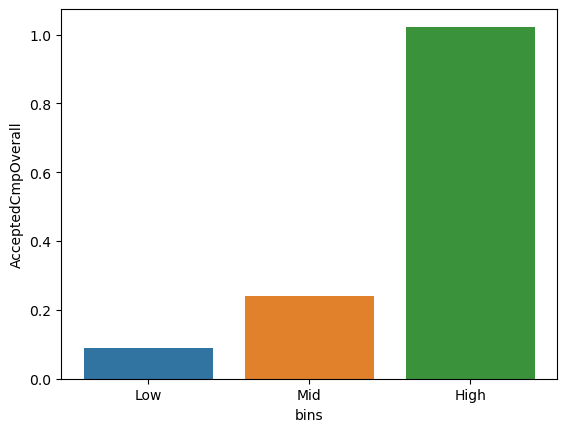

In [97]:
sns.barplot(accepted_promotions, y = 'AcceptedCmpOverall', x = 'bins', hue = 'bins')
plt.plot()

**One of the most important group that we should focus on is the high level in terms of income ranging from 76400 and 113734 (high income). Definitively avoid the low income group**

In [83]:
bins2 = [23, 30, 40, 50, 60, 70, 80] 
labels2 = ['23-30', '30-40', '40-50', '50-60', '60-70', '70-85']  
ufood['bins2'] = pd.cut(ufood['Age'], bins=bins2, labels=labels2, right=False)

In [85]:
accepted_promotions_age = ufood.groupby('bins2')['AcceptedCmpOverall'].mean().reset_index()
accepted_promotions_age

C:\Users\maxim\AppData\Local\Temp\ipykernel_30864\4032238630.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  accepted_promotions_age = ufood.groupby('bins2')['AcceptedCmpOverall'].mean().reset_index()


,bins2,AcceptedCmpOverall
0,23-30,0.534884
1,30-40,0.372024
2,40-50,0.238784
3,50-60,0.278409
4,60-70,0.300211
5,70-85,0.436090


[]

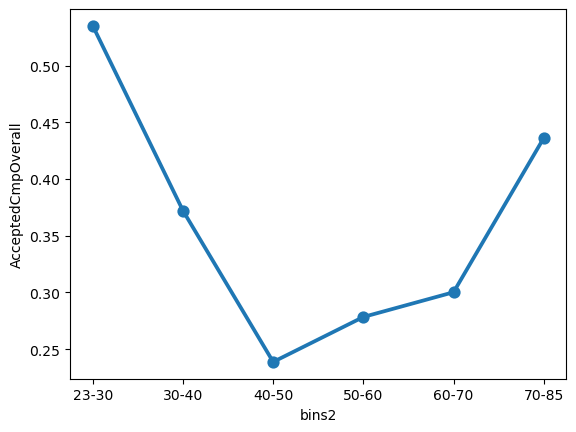

In [87]:
sns.pointplot(accepted_promotions_age, y = 'AcceptedCmpOverall', x = 'bins2')
plt.plot()

**the majority of people who do not accepted campaign are between 40 and 70 years old**

In [108]:
ufood['proportion'] = (ufood['MntRegularProds']/ufood['MntTotal'])*100
proportion = ufood[ufood['proportion']>0]

In [110]:
bins3 = [0, 25, 50, 75, 100] 
labels3 = ['0-24', '25-50', '50-74', '75-100']  
ufood['bins3'] = pd.cut(ufood['proportion'], bins=bins3, labels=labels3, right=False)

In [112]:
accepted_promotions_proportion = ufood.groupby('bins3')['AcceptedCmpOverall'].mean().reset_index()

C:\Users\maxim\AppData\Local\Temp\ipykernel_30864\3163973022.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  accepted_promotions_proportion = ufood.groupby('bins3')['AcceptedCmpOverall'].mean().reset_index()


Text(0.5, 1.0, 'higher proportion between RP/RT = more accepted campaings')

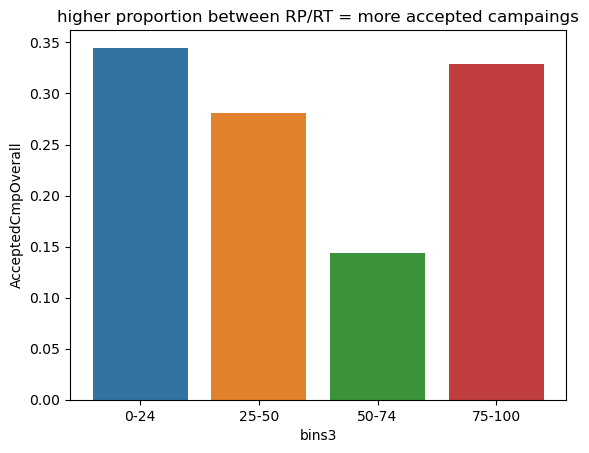

In [114]:
sns.barplot(accepted_promotions_proportion, y = 'AcceptedCmpOverall', x = 'bins3', hue = 'bins3')
plt.plot()
plt.title('higher proportion between RP/RT = more accepted campaings')

**the RP/RT is described as follows: (AMOUNT OF REGULAR PRODUCTS)/(AMOUNT OF TOTAL PRODUCTS). Why? By using these proportion we get a better glance at customer behavior and we see that the two "tails" of the graph gather the most likely groups to get **

In [120]:
cmp_dis = ufood[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmpOverall']]
cmp_dis = cmp_dis[cmp_dis['AcceptedCmpOverall'] == 1]
two_cmp = cmp_dis.agg(stage1 = ('AcceptedCmp1','sum'), stage2 = ('AcceptedCmp2','sum'), stage3 = ('AcceptedCmp3','sum'), 
                      stage4 = ('AcceptedCmp4','sum'),
          stage5 = ('AcceptedCmp5','sum'), cmp_count_total = ('AcceptedCmpOverall','sum'))

In [124]:
count_cmp = np.diag(two_cmp)
two_cmp['count']= count_cmp
result_cmp = two_cmp[two_cmp['count'] < 200]
result_cmp = result_cmp.reset_index(names = 'stages')
result_cmp_transpose = two_cmp[['count']].transpose()

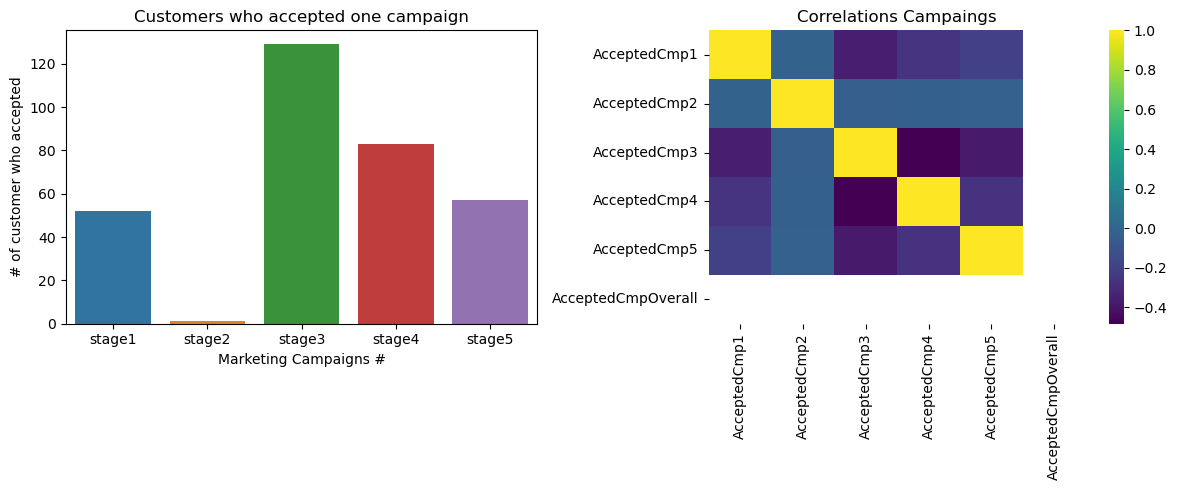

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmpOverall
AcceptedCmp1,1.000000,-0.024494,-0.358786,-0.258619,-0.203533,NaN
AcceptedCmp2,-0.024494,1.000000,-0.045631,-0.032892,-0.025886,NaN
AcceptedCmp3,-0.358786,-0.045631,1.000000,-0.481788,-0.379167,NaN
AcceptedCmp4,-0.258619,-0.032892,-0.481788,1.000000,-0.273309,NaN
AcceptedCmp5,-0.203533,-0.025886,-0.379167,-0.273309,1.000000,NaN
AcceptedCmpOverall,NaN,NaN,NaN,NaN,NaN,NaN


In [134]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))  # 1 fila, 2 columnas

# Gráfica 1
sns.barplot(result_cmp, ax= axs[0] ,y = 'count', x = 'stages', hue = 'stages')
axs[0].set_title('Customers who accepted one campaign')
axs[0].set_xlabel('Marketing Campaigns #')
axs[0].set_ylabel('# of customer who accepted')

# Gráfica 2
sns.heatmap(cmp_dis.corr(method = 'spearman'), ax = axs[1],cmap='viridis')
axs[1].set_title('Correlations Campaings')


# Ajustar el layout
plt.tight_layout()
plt.show()
cmp_dis.corr(method = 'spearman')

**83% of people who accepted the campaign did it after the third stage of it. We should adopt the same strategies applied for stage 3,4 and 5, and avoid stage 2's strategies. This is in terms of users who accepted only one campaign across the five of them. It was done this way to see the real impact of having multiple campaign. Also having low correlation between campaigns is a good indicator that they work as a independet events, so it has sense to do more than one campaign**

<Axes: xlabel='Kidhome', ylabel='AcceptedCmpOverall'>

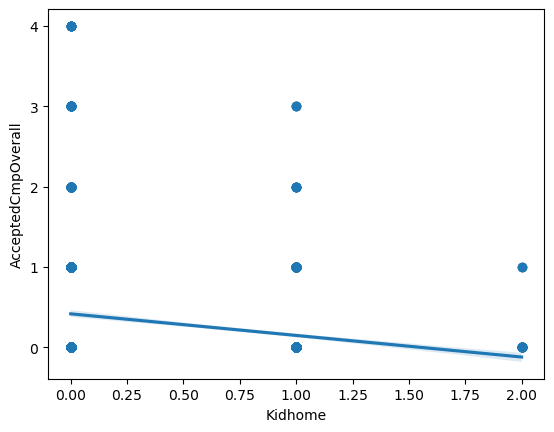

In [289]:
sns.regplot(ufood,y = 'AcceptedCmpOverall', x = 'Kidhome')

**As an extra filter for marketing campaigns we should focus on people who do not have kids at home since they tend to accept more our promotions**

<h2 style="color: blue;">General Recommendations to Increase Marketing Campaigns Efficiency:</h2>
<p style="font-size: 25px;">1. Avoid people with an income lower than 39000</p>
<p style="font-size: 25px;">2. Avoid ages between 40 and 70 years old</p>
<p style="font-size: 25px;">3. Aim for an RP/RT proportion greater than 75 and lower than than 50</p>
<p style="font-size: 25px;">4. There is a great impact on having multiple marketing campaigns. Try to use the strategies of the last three of them in the next camapign in order to reduce the add cost of having multiple of camapaigns</p>





